In [111]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [112]:
# Importing Dataset

df = pd.read_csv("Churn_Modelling.csv")

In [113]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [114]:
df.shape

(10000, 14)

The Df has 1000 rows with 14 attributes. We review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling.

In [115]:
# Check columns list and missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Well from the above we can see that there is no missing values.

In [116]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [117]:
# Drop the columns which is not relevant
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [118]:
# Review the dataset again

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [119]:
# Check the datatype of each variable

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [120]:
# Check the summary of the dataset

df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [121]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Exploratory Data Analysis

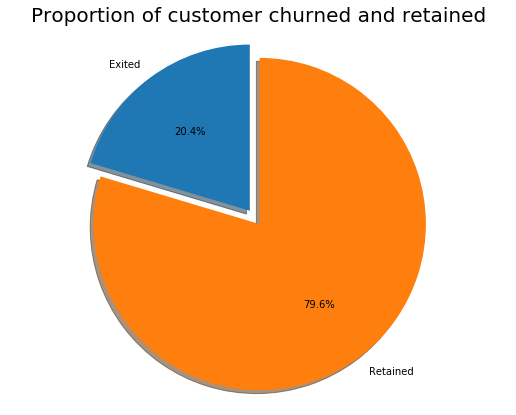

In [122]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

From above pie chart,we can see that around 20% of customers had churned i.e exited and 80% retained.This shows that our dataset is a little imbalanced so we have to predict customer churn with a good accuracy as this 20% customers are of more interest to the bank.

### Now visualizing countplots for categorical columns.

Text(0.5, 1.0, 'Countplot-Geography Column')

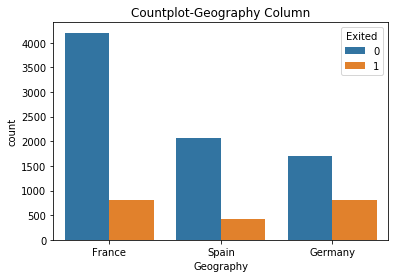

In [123]:
sns.countplot(x='Geography', hue = 'Exited',data = df).set_title('Countplot-Geography Column')

Total number of customers who retained is highest from France and those who exited are highest from Germany,which means the bank needs to focus more on customers from Germany followed by France so that they don't churn.

Text(0.5, 1.0, 'Countplot-Gender Column')

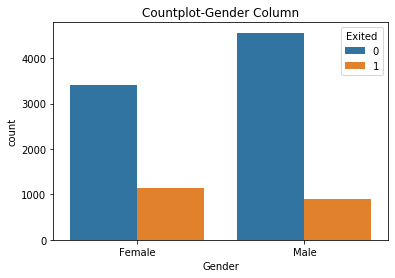

In [124]:
sns.countplot(x='Gender', hue = 'Exited',data = df).set_title('Countplot-Gender Column')

The proportion of female customers churning is greater than that of male customers.

Text(0.5, 1.0, 'Countplot-HasCreditCard Column')

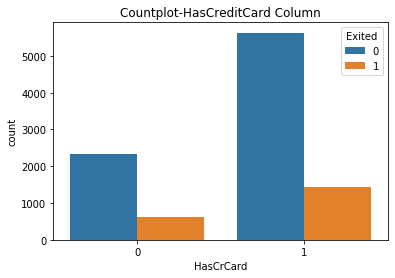

In [125]:
sns.countplot(x='HasCrCard', hue = 'Exited',data = df).set_title('Countplot-HasCreditCard Column')

Suprisingly,coustomers who had credit card churned more which can be a coincidence

Text(0.5, 1.0, 'Countplot-IsActiveMember Column')

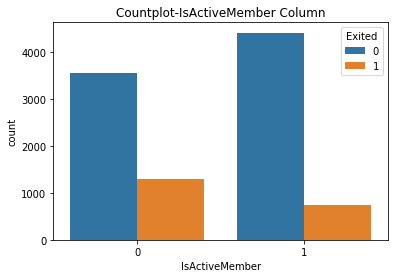

In [126]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df).set_title('Countplot-IsActiveMember Column')

As usual,the inactive members churned more.

### Now visualize boxplot for numerical data

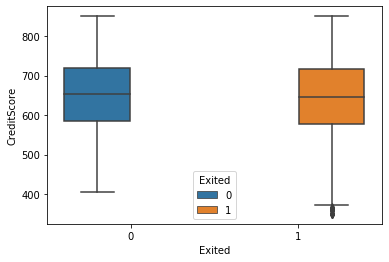

In [127]:
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df)

There is no significant difference in the credit score distribution between retained and churned customers.

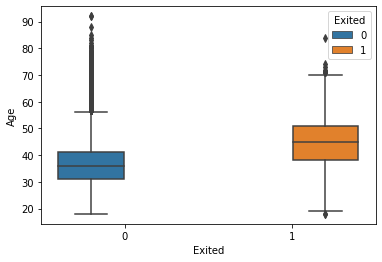

In [128]:
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df)

The older customers are churning more than the young ones which indicates that the bank need to focus on older customers more.

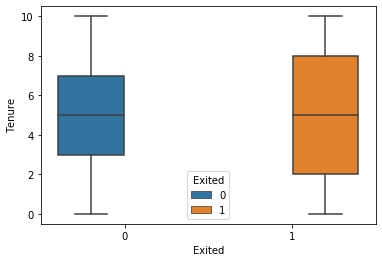

In [129]:
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df)

Customers with tenure period with bank either too less or too more tends to churn more.

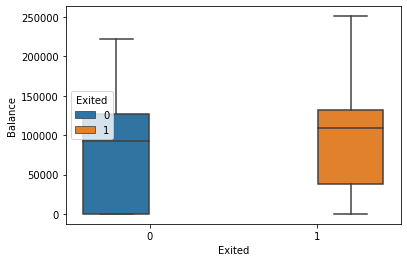

In [130]:
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df)

Customers who churned generally have more bank balance which is a bad indications as it will lead to capital deficiency in the bank.

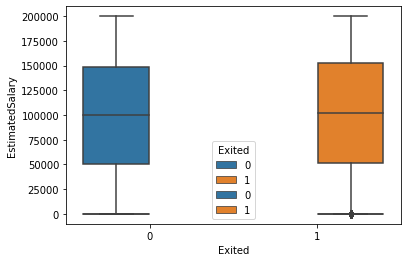

In [131]:
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df)
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df)

Neither the product nor the salary has a significant effect on the likelihood to churn.

# Feature Engineering

In [132]:
# One-hot encoding categorical columns

from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df['Gender']= le.fit_transform(df['Gender']) 
df['Geography']= le.fit_transform(df['Geography']) 

# Gender 0-Female,1-Male
# Geography 0-France,1-Germany,2-Spain

In [133]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [134]:
df1 = pd.get_dummies(data=df, columns=['Gender','Geography'])
df1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_0', 'Gender_1',
       'Geography_0', 'Geography_1', 'Geography_2'],
      dtype='object')

In [135]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [136]:
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']

In [137]:
continuous_vars

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

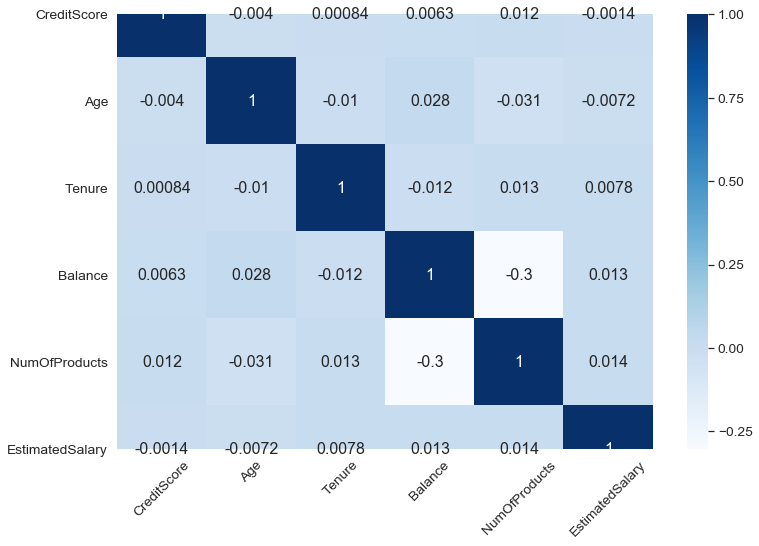

In [170]:
#Correlation Matrix for continuous attributes

plt.figure(figsize = (12, 8))
ax = sns.heatmap(df[continuous_vars].corr(), annot = True, annot_kws = {'fontsize': 16}, cmap = 'Blues')

ax.tick_params(axis = 'x', rotation = 45)
ax.tick_params(axis = 'y', rotation = 360)

There is no significant intercorrelation between our features, so we do not have to worry about multicollinearity.

In [138]:
# Scaling the continuous attributes using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[continuous_vars] = scaler.fit_transform(df1[continuous_vars])

In [139]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,1,0,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,1,0,0,0,1
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,1,0,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,1,0,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1,0,0,0,1


In [140]:
df1.shape

(10000, 14)

# Data Preparation and Spliting


In [141]:
# Distinguish the feature and target set and divide the data set into training and test sets

X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [142]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

# Model Building & Performance Checking

In [143]:
# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [147]:
# Fitting Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [148]:
y_pred_lr = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print((accuracy * 100.0))

85.05


In [149]:
f1_score(y_test, y_pred_lr)

0.5622254758418742

In [150]:
# Fitting XGB Classifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [151]:
y_pred_xgb = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print((accuracy * 100.0))

85.05


In [152]:
f1_score(y_test, y_pred_xgb)

0.5622254758418742

In [153]:
# Fitting random forest classifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [154]:
y_pred_rf = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print((accuracy * 100.0))

85.55


In [155]:
f1_score(y_test, y_pred_rf)

0.5546995377503852

In [156]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [158]:
y_train.value_counts()

1    6370
0    6370
Name: Exited, dtype: int64

In [161]:
# Fitting Logistic Regression

lr2 = LogisticRegression()
lr2.fit(X_train, y_train)

LogisticRegression()

In [162]:
l=lr2
print(f1_score(y_train,  a.predict(X_train)))

0.9626722204421659


In [163]:
# Fitting random forest classifier

rf2 = RandomForestClassifier()
rf2.fit(X_train, y_train)

RandomForestClassifier()

In [164]:
r=rf2
print(f1_score(y_train,  r.predict(X_train)))

1.0


In [165]:
# Fitting XGB Classifier

xgb2 = XGBClassifier()
xgb2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [166]:
x=xgb2
print(f1_score(y_train,  x.predict(X_train)))

0.9626722204421659


## Conclusion

Final F1 score of 1 achieved using Random Forest Classifier model.